In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d "minatverma/nse-stocks-data"

Dataset URL: https://www.kaggle.com/datasets/minatverma/nse-stocks-data
License(s): CC0-1.0
 50% 15.0M/29.9M [00:00<00:00, 154MB/s]
100% 29.9M/29.9M [00:00<00:00, 194MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/nse-stocks-data.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv('/content/FINAL_FROM_DF.csv')
df.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021


In [6]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

In [7]:
selected_company = 'ICICIBANK'
df = df[(df['SYMBOL'] == selected_company) & (df['SERIES'] == 'EQ')]

In [8]:
df = df.sort_values(by='TIMESTAMP', ascending=True)
df.set_index('TIMESTAMP', inplace=True)

In [9]:
df

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,ISIN
TIMESTAMP,,,,,,,,,,,,
2016-01-01,ICICIBANK,EQ,261.30,263.60,258.00,263.00,262.55,261.35,5452815,1.424922e+09,36204,INE090A01021
2016-01-04,ICICIBANK,EQ,261.00,261.35,254.65,255.55,256.00,263.00,8577993,2.202167e+09,65648,INE090A01021
2016-01-05,ICICIBANK,EQ,256.25,257.50,251.70,256.70,257.05,255.55,8151798,2.079172e+09,69866,INE090A01021
2016-01-06,ICICIBANK,EQ,255.40,256.75,249.20,250.10,250.20,256.70,15832892,3.996941e+09,104952,INE090A01021
2016-01-07,ICICIBANK,EQ,246.40,247.70,243.10,246.75,247.10,250.10,16582466,4.066715e+09,111225,INE090A01021
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,ICICIBANK,EQ,315.00,319.20,313.80,316.60,316.45,315.45,7628532,2.415161e+09,70169,INE090A01021
2017-12-26,ICICIBANK,EQ,316.25,319.00,313.20,318.15,317.85,316.60,7632721,2.417117e+09,68638,INE090A01021
2017-12-27,ICICIBANK,EQ,315.95,317.90,312.10,312.80,312.50,318.15,6354635,2.000406e+09,65362,INE090A01021


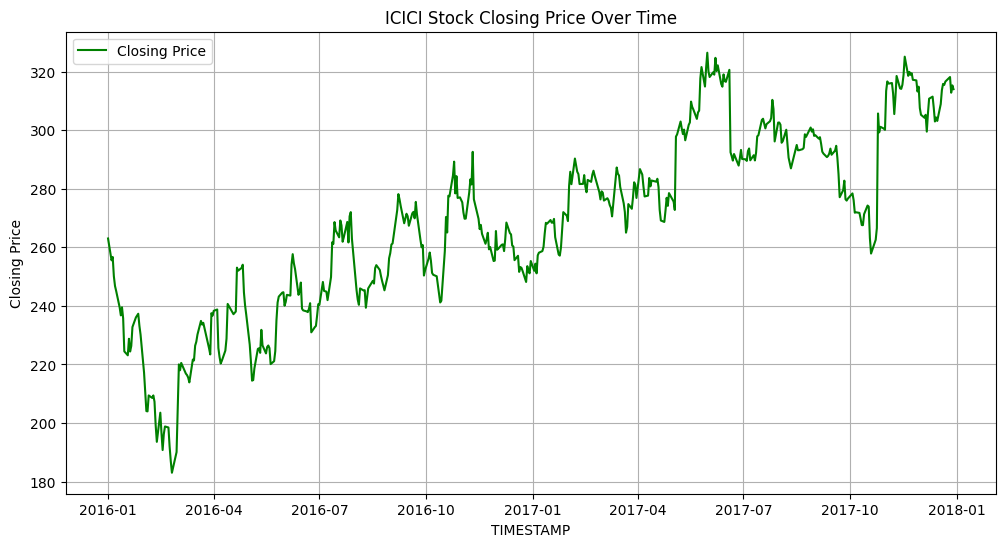

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['CLOSE'], label='Closing Price', color='green')
plt.title("ICICI Stock Closing Price Over Time")
plt.xlabel("TIMESTAMP")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()

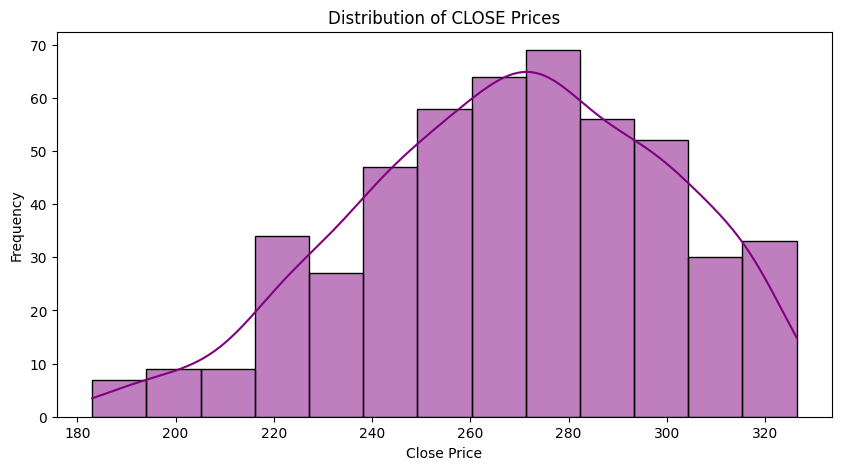

In [11]:
# distribution of CLOSE prices
plt.figure(figsize=(10, 5))
sns.histplot(df['CLOSE'], kde=True, color='purple')
plt.title("Distribution of CLOSE Prices")
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

In [12]:
df['PRICE_CHANGE'] = (df['CLOSE'] - df['PREVCLOSE']) / df['PREVCLOSE'] * 100
df['PRICE_RANGE'] = df['HIGH'] - df['LOW']
df['PRICE_RANGE']

,PRICE_RANGE
TIMESTAMP,
2016-01-01,5.60
2016-01-04,6.70
2016-01-05,5.80
2016-01-06,7.55
2016-01-07,4.60
...,...
2017-12-22,5.40
2017-12-26,5.80
2017-12-27,5.80


In [13]:
df['PRICE_CHANGE']

,PRICE_CHANGE
TIMESTAMP,
2016-01-01,0.631337
2016-01-04,-2.832700
2016-01-05,0.450010
2016-01-06,-2.571095
2016-01-07,-1.339464
...,...
2017-12-22,0.364559
2017-12-26,0.489577
2017-12-27,-1.681597


In [14]:

df['AVGTRDVAL'] = df['TOTTRDVAL'] / df['TOTTRDQTY']
df['MA5'] = df['CLOSE'].rolling(window=5).mean()

df['MA5']

,MA5
TIMESTAMP,
2016-01-01,NaN
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,254.42
...,...
2017-12-22,314.09
2017-12-26,315.94
2017-12-27,315.76


In [15]:
df['AVGTRDVAL']

,AVGTRDVAL
TIMESTAMP,
2016-01-01,261.318546
2016-01-04,256.722877
2016-01-05,255.056808
2016-01-06,252.445397
2016-01-07,245.241881
...,...
2017-12-22,316.595710
2017-12-26,316.678256
2017-12-27,314.794814


In [16]:
df['VOLATILITY'] = df['CLOSE'].rolling(window=5).std()
df['VOLATILITY']


,VOLATILITY
TIMESTAMP,
2016-01-01,NaN
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,6.276603
...,...
2017-12-22,3.088770
2017-12-26,1.627652
2017-12-27,1.954290


In [17]:
print(df.isnull().sum())

SYMBOL          0
SERIES          0
OPEN            0
HIGH            0
LOW             0
CLOSE           0
LAST            0
PREVCLOSE       0
TOTTRDQTY       0
TOTTRDVAL       0
TOTALTRADES     0
ISIN            0
PRICE_CHANGE    0
PRICE_RANGE     0
AVGTRDVAL       0
MA5             4
VOLATILITY      4
dtype: int64


In [18]:
df['MA5'] = df['MA5'].fillna(df['MA5'].mean())
df['VOLATILITY'] = df['VOLATILITY'].fillna(df['VOLATILITY'].mean())   #Filling the null values with mean

In [19]:

df.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,ISIN,PRICE_CHANGE,PRICE_RANGE,AVGTRDVAL,MA5,VOLATILITY
TIMESTAMP,,,,,,,,,,,,,,,,,
2016-01-01,ICICIBANK,EQ,261.30,263.60,258.00,263.00,262.55,261.35,5452815,1.424922e+09,36204,INE090A01021,0.631337,5.60,261.318546,268.0789,4.552906
2016-01-04,ICICIBANK,EQ,261.00,261.35,254.65,255.55,256.00,263.00,8577993,2.202167e+09,65648,INE090A01021,-2.832700,6.70,256.722877,268.0789,4.552906
2016-01-05,ICICIBANK,EQ,256.25,257.50,251.70,256.70,257.05,255.55,8151798,2.079172e+09,69866,INE090A01021,0.450010,5.80,255.056808,268.0789,4.552906
2016-01-06,ICICIBANK,EQ,255.40,256.75,249.20,250.10,250.20,256.70,15832892,3.996941e+09,104952,INE090A01021,-2.571095,7.55,252.445397,268.0789,4.552906
2016-01-07,ICICIBANK,EQ,246.40,247.70,243.10,246.75,247.10,250.10,16582466,4.066715e+09,111225,INE090A01021,-1.339464,4.60,245.241881,254.4200,6.276603


In [20]:
print(df.dtypes)

SYMBOL           object
SERIES           object
OPEN            float64
HIGH            float64
LOW             float64
CLOSE           float64
LAST            float64
PREVCLOSE       float64
TOTTRDQTY         int64
TOTTRDVAL       float64
TOTALTRADES       int64
ISIN             object
PRICE_CHANGE    float64
PRICE_RANGE     float64
AVGTRDVAL       float64
MA5             float64
VOLATILITY      float64
dtype: object


In [21]:
drop_df = df.drop(columns=['SYMBOL','SERIES','ISIN'],axis=1)
drop_df


,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,PRICE_CHANGE,PRICE_RANGE,AVGTRDVAL,MA5,VOLATILITY
TIMESTAMP,,,,,,,,,,,,,,
2016-01-01,261.30,263.60,258.00,263.00,262.55,261.35,5452815,1.424922e+09,36204,0.631337,5.60,261.318546,268.0789,4.552906
2016-01-04,261.00,261.35,254.65,255.55,256.00,263.00,8577993,2.202167e+09,65648,-2.832700,6.70,256.722877,268.0789,4.552906
2016-01-05,256.25,257.50,251.70,256.70,257.05,255.55,8151798,2.079172e+09,69866,0.450010,5.80,255.056808,268.0789,4.552906
2016-01-06,255.40,256.75,249.20,250.10,250.20,256.70,15832892,3.996941e+09,104952,-2.571095,7.55,252.445397,268.0789,4.552906
2016-01-07,246.40,247.70,243.10,246.75,247.10,250.10,16582466,4.066715e+09,111225,-1.339464,4.60,245.241881,254.4200,6.276603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,315.00,319.20,313.80,316.60,316.45,315.45,7628532,2.415161e+09,70169,0.364559,5.40,316.595710,314.0900,3.088770
2017-12-26,316.25,319.00,313.20,318.15,317.85,316.60,7632721,2.417117e+09,68638,0.489577,5.80,316.678256,315.9400,1.627652
2017-12-27,315.95,317.90,312.10,312.80,312.50,318.15,6354635,2.000406e+09,65362,-1.681597,5.80,314.794814,315.7600,1.954290


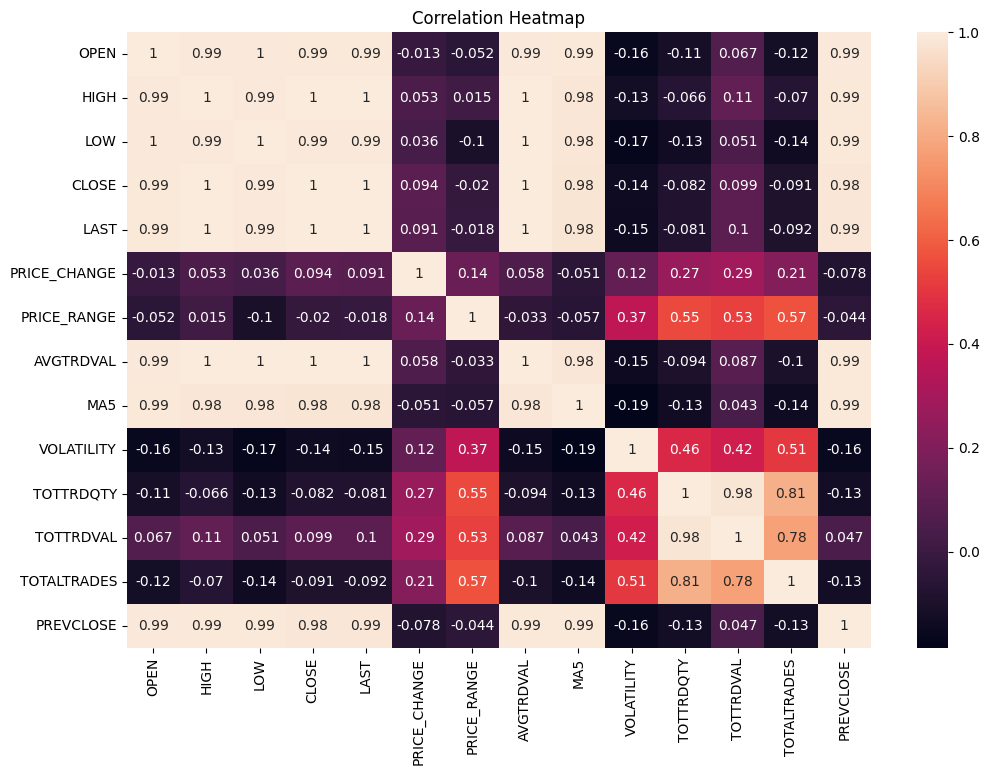

In [22]:
#co-relation between numeric columns
numeric_columns = ['OPEN', 'HIGH', 'LOW', 'CLOSE', 'LAST', 'PRICE_CHANGE',
                     'PRICE_RANGE', 'AVGTRDVAL', 'MA5', 'VOLATILITY',
                     'TOTTRDQTY', 'TOTTRDVAL', 'TOTALTRADES', 'PREVCLOSE']

plt.figure(figsize=(12, 8))
sns.heatmap(drop_df[numeric_columns].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [23]:
#split data into train and test set
train_data = drop_df.iloc[:int(0.8 * len(df))]
test_data = drop_df.iloc[int(0.8 * len(df)):]

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(train_data)
scaled_test = scaler.transform(test_data)

In [25]:
train_data.shape,test_data.shape

((396, 14), (99, 14))

In [26]:
len(train_data),len(test_data)

(396, 99)

In [27]:
# Function to create sequences
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i - look_back:i])
        y.append(data[i, 0])  # Assuming target is in the first column
    return np.array(X), np.array(y)

# Create sequences for training and testing
window_size = 60
X_train, y_train = create_sequences(scaled_train, window_size)
X_test, y_test = create_sequences(scaled_test, window_size)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], -1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], -1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(336, 60, 14) (39, 60, 14)
(336,) (39,)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.initializers import HeNormal
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import random
import tensorflow as tf

In [29]:
#Create the stacked lstm model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True,
               input_shape=(X_train.shape[1], X_train.shape[2]),
               kernel_initializer=HeNormal()))

model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 100)             │          46,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,501 (494.14 KB)

 Trainable params: 126,501 (494.14 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=1, validation_data=(X_test, y_test),
                    callbacks=[early_stopping], verbose=1)

Epoch 1/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - loss: 0.0495 - val_loss: 0.0095
Epoch 2/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 24s 72ms/step - loss: 0.0093 - val_loss: 0.0019
Epoch 3/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - loss: 0.0072 - val_loss: 0.0101
Epoch 4/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - loss: 0.0040 - val_loss: 0.0014
Epoch 5/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 44s 78ms/step - loss: 0.0035 - val_loss: 0.0048
Epoch 6/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 22s 67ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 7/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 25s 75ms/step - loss: 0.0042 - val_loss: 6.7277e-04
Epoch 8/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 40s 72ms/step - loss: 0.0028 - val_loss: 0.0042
Epoch 9/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 10/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 11/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 24s 72ms/step - loss: 0.0023 - val_loss: 0.0059
Epoch 12/30
336/336 ━━━━━━

In [32]:
predicted_price = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step


In [33]:

predicted_price = scaler.inverse_transform(np.concatenate((predicted_price, np.zeros((predicted_price.shape[0], scaled_train.shape[1] - 1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_train.shape[1] - 1))), axis=1))[:, 0]

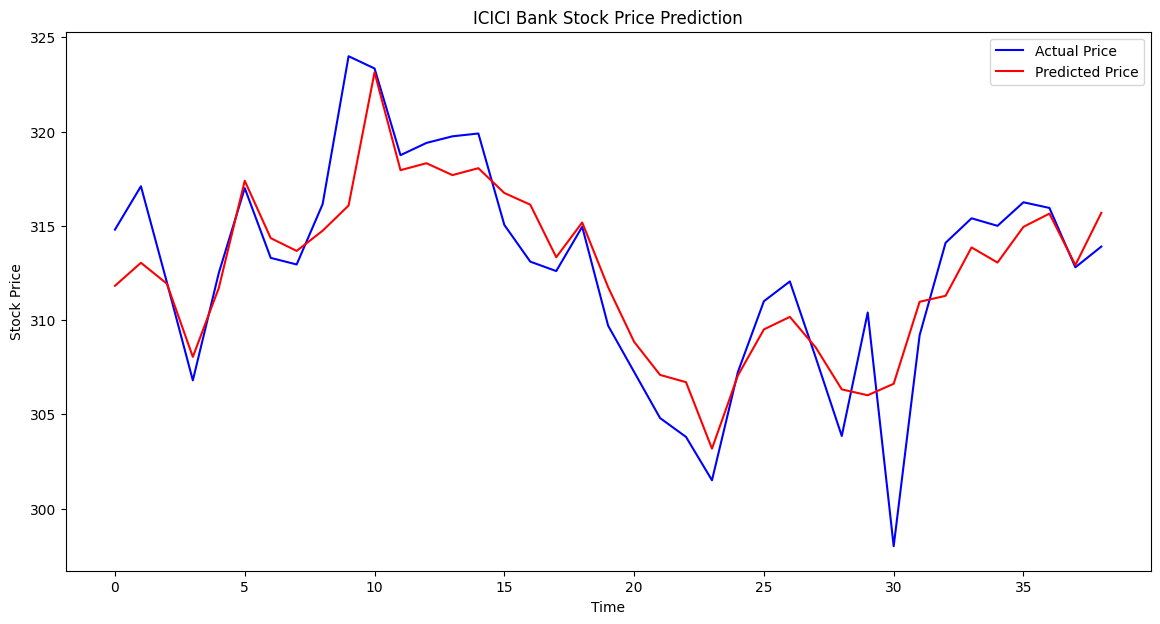

In [34]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, color='blue', label='Actual Price')
plt.plot(predicted_price, color='red', label='Predicted Price')
plt.title('ICICI Bank Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [35]:

rmse = math.sqrt(mean_squared_error(y_test_actual, predicted_price))
mae = mean_absolute_error(y_test_actual, predicted_price)
train_predicted_price = model.predict(X_train)
train_predicted_price = scaler.inverse_transform(np.concatenate((train_predicted_price, np.zeros((train_predicted_price.shape[0], scaled_train.shape[1] - 1))), axis=1))[:, 0]
y_train_actual = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], scaled_train.shape[1] - 1))), axis=1))[:, 0]
train_r2 = r2_score(y_train_actual, train_predicted_price)
test_r2 = r2_score(y_test_actual, predicted_price)


print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f"R² score for Training Data: {train_r2}")
print(f"R² score for Test Data: {test_r2}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
RMSE: 2.6183281575584543
MAE: 1.8971484942313925
R² score for Training Data: 0.9393367938368481
R² score for Test Data: 0.7838093446151461


In [36]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

future_days = 30
current_input = scaled_test[-window_size:].copy()

predicted_future_prices = []

for day in range(future_days):
    # Predict next price
    predicted_next = model.predict(current_input.reshape(1, window_size, -1))

    # Append the predicted price
    predicted_future_prices.append(predicted_next[0, 0])

    # Prepare input for the next prediction
    next_input = np.zeros((1, scaled_test.shape[1]))
    next_input[0, 0] = predicted_next  # Update the target value
    current_input = np.vstack([current_input[1:], next_input])  # Slide the window


# Generate future dates
last_date = test_data.index[-1]
future_dates = pd.date_range(last_date, periods=future_days + 1, freq='B')[1:]

# Inverse transform to get actual prices
predicted_future_prices_actual = scaler.inverse_transform(
    np.hstack((np.array(predicted_future_prices).reshape(-1, 1),
               np.zeros((len(predicted_future_prices), scaled_test.shape[1] - 1)))
    )
)[:, 0]

# Retrieve past 60 days prices for visualization
past_prices_actual = scaler.inverse_transform(scaled_test[-window_size:])[:, 0]
past_dates = test_data.index[-window_size:]

# Combine past and future dates and prices
all_dates = np.concatenate([past_dates, future_dates])
all_prices = np.concatenate([past_prices_actual, predicted_future_prices_actual])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━

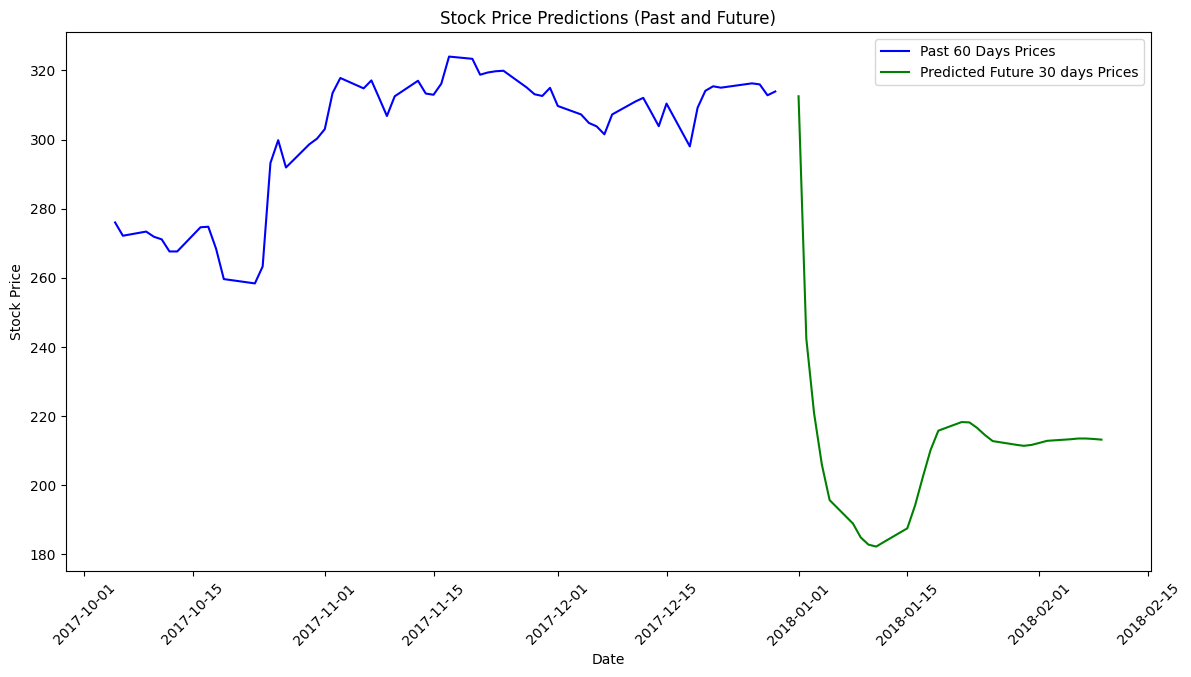

In [39]:
plt.figure(figsize=(14, 7))
plt.plot(past_dates, past_prices_actual, color='blue', label='Past 60 Days Prices')
plt.plot(future_dates, predicted_future_prices_actual, color='green', label='Predicted Future 30 days Prices')
plt.title('Stock Price Predictions (Past and Future)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()